# Logistic Regression
Used to predict categorical values (rather than continuous values)

In [37]:
# customer info
import random

X = [
    [35, 'M', 5000],
    [45, 'M', 8000],
    [28, 'F', 3500]
]
# did churn
y = [
    False,
    False,
    True
]

# Define the number of additional rows to add
num_rows = 100

for _ in range(num_rows):
    # Generate random values similar to the existing data
    age = random.randint(25, 60)
    gender = random.choice(['M', 'F'])
    
    income_initial = round(100 * (age*3))
    prob_modifier = random.randint(1, 10)
    income = income_initial / ((prob_modifier % 3) + 1) # Salary has a chance of being cut by 50%-75%

    # Append the new row to X
    X.append([age, gender, income])

    # Generate the corresponding y value, less likely if higher salary
    y.append((random.randint(1,income) < 3000))



In [38]:
import numpy as np

X = np.array(X) # Note that this array will be string type
y = np.array(y)

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
# Perform the one-hot encoding
X_gender = X[:,1]
print(X_gender.shape)

X_gender = X_gender.reshape(-1, 1) # Reshape into a 2D array
print(X_gender.shape)

encoder = OneHotEncoder(sparse=False, dtype=int) # Ensure the results are 'int'
encoder.fit(X_gender)
print(encoder.categories_)

X_gender = encoder.transform(X_gender)

(103,)
(103, 1)
[array(['F', 'M'], dtype='<U11')]


c:\Users\amardian\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [41]:
# Two ways adding the econding gender values
# INSERT or HSTACK

# INSERT
X = np.insert(X[:,[0,2]], [1], X_gender, axis=1)
X = X.astype(int) # Ensure the array is int type

# HSTACK
# X = np.hstack((X[:,[0,2]], X_gender))
print(X)

[[   35     0     1  5000]
 [   45     0     1  8000]
 [   28     1     0  3500]
 [   53     0     1  4543]
 [   56     0     1  8400]
 [   53     1     0  4543]
 [   37     1     0  7400]
 [   52     1     0  5200]
 [   25     1     0  5000]
 [   29     0     1  2486]
 [   33     0     1  3960]
 [   59     0     1  5057]
 [   40     0     1  4000]
 [   26     1     0  3900]
 [   50     0     1  7500]
 [   52     1     0  5200]
 [   31     1     0  6200]
 [   60     0     1 18000]
 [   44     0     1  6600]
 [   43     0     1  8600]
 [   46     0     1  4600]
 [   34     1     0  3400]
 [   58     1     0  5800]
 [   29     0     1  2486]
 [   57     0     1  6840]
 [   53     1     0  4543]
 [   51     1     0  6120]
 [   39     1     0  4680]
 [   60     0     1 18000]
 [   58     1     0  5800]
 [   57     1     0  6840]
 [   33     0     1  3960]
 [   49     0     1  9800]
 [   41     0     1  3514]
 [   33     0     1  3960]
 [   57     0     1  6840]
 [   30     0     1  9000]
 

In [42]:
# create model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [43]:
# train model
model.fit(X, y)

LogisticRegression()

In [73]:
# make a prediction
new_input = np.array([[55, 'M', 7000]])

# encode gender
new_input_gender = new_input[:, 1].reshape(-1, 1)
new_input_gender = encoder.transform(new_input_gender)

# combine encoded gender with initial data using INSERT method, at index 1 (col 2) in between age and salary
new_input = np.insert(new_input[:, [0,2]], [1], new_input_gender, axis=1)
new_input = new_input.astype(int)
print(new_input)

[[  55    0    1 7000]]


In [74]:
pred = model.predict(new_input)

In [75]:
user_age = new_input[0,0]
user_gen = ("Male" if new_input[0,1] == 0 else "Female")
user_sal = new_input[0,3]
print(f"A {user_age} year old {user_gen} making ${user_sal} will churn")
print(pred)

A 55 year old Male making $7000 will churn
[False]


In [47]:
ticks = range(2000, 20000, 2000)
print(ticks)

range(2000, 20000, 2000)


## Plot the relation between salary & age and churn

1. Age has a mild positive correlation salary
2. Salary has a strong positive correlation on churn

As expected, since salary has a strong affect on churn, the higher the salary the less likely (black dot) to churn
Since age & salary have mild relation, age also affects  churn rate, however, as age increases, churn only slightly decreases

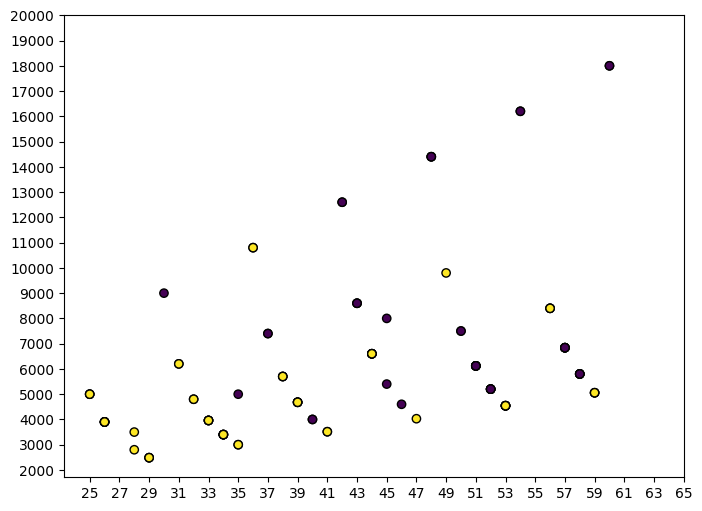

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 3], c=y, edgecolors='k')

plt.xticks(range(25, 66, 2))
plt.yticks(range(2000, 20001, 1000))


plt.show()